In [1]:
import nltk
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Descargar datos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Cargar el dataset
data = pd.read_csv('../Data/sdata.csv', nrows=5000)
AllReviews = data['text']

In [3]:
def token():
    """Tokenización de las primeras reseñas"""
    for i in range(2):  # Para mostrar las dos primeras reseñas
        sentences = sent_tokenize(AllReviews[i])
        for sentence in sentences:
            words = word_tokenize(sentence)
            print(f"{sentence}\n{words}\n")

token()

Super simple place but amazing nonetheless.
['Super', 'simple', 'place', 'but', 'amazing', 'nonetheless', '.']

It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.
['It', "'s", 'been', 'around', 'since', 'the', '30', "'s", 'and', 'they', 'still', 'serve', 'the', 'same', 'thing', 'they', 'started', 'with', ':', 'a', 'bologna', 'and', 'salami', 'sandwich', 'with', 'mustard', '.']

Staff was very helpful and friendly.
['Staff', 'was', 'very', 'helpful', 'and', 'friendly', '.']

Small unassuming place that changes their menu every so often.
['Small', 'unassuming', 'place', 'that', 'changes', 'their', 'menu', 'every', 'so', 'often', '.']

Cool decor and vibe inside their 30 seat restaurant.
['Cool', 'decor', 'and', 'vibe', 'inside', 'their', '30', 'seat', 'restaurant', '.']

Call for a reservation.
['Call', 'for', 'a', 'reservation', '.']

We had their beef tartar and pork belly to start and a salmon dish and lam

In [4]:
def exercise_1():
    """Ejemplo de preguntas que podemos responder y preguntas que requieren más datos."""
    q1 = "What are the most common complaints in negative reviews?"
    q2 = "Did a recent change in management affect customer satisfaction?"
    a1 = "By analyzing frequent negative terms, we can determine key complaints."
    a2 = "To answer this, we would need timestamps and management change data."
    return q1, a1, q2, a2

print(exercise_1())

('What are the most common complaints in negative reviews?', 'By analyzing frequent negative terms, we can determine key complaints.', 'Did a recent change in management affect customer satisfaction?', 'To answer this, we would need timestamps and management change data.')


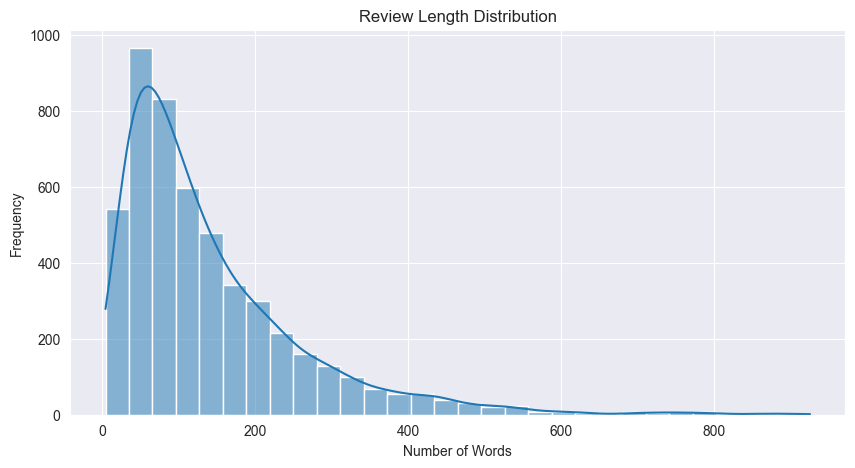

('Bon  Muffin !!! Succulent',
 'I visited the Dowd YMCA for the first time last night for a workout and a session in their steam room. Normally I\'m a regular at the south Charlotte Y\'s (Morrison, Harris & Siskey) but since it\'s a new year, I figured I\'d try my hand at visiting this Y after work, since it\'s only about 1.5 miles from my office. The reviews here helped to convince me to give it a try, so I figured I\'d write my own review as well to add to the information.\n\nI showed up around 4:45 and managed to find a spot. As soon as I walked through the turnstile I went to the guest relations desk and asked the woman behind the counter if she could direct me to the women\'s locker rooms. She offered right there to give me a full tour, so I took her up on the offer.\n\nThe facility is large, and as others have remarked, bustling. There were multiple basketball courts, two sets of lap lanes in the swimming pool (one warm, one cold), and all the other features you\'d expect at a gy

In [5]:
def exercise_2():
    """Análisis de la longitud de las reseñas y visualización."""
    review_lengths = data['text'].apply(lambda x: len(x.split()))
    shortest_review = data.iloc[review_lengths.idxmin()]['text']
    longest_review = data.iloc[review_lengths.idxmax()]['text']

    plt.figure(figsize=(10,5))
    sns.histplot(review_lengths, bins=30, kde=True)
    plt.title("Review Length Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

    return shortest_review, longest_review

exercise_2()

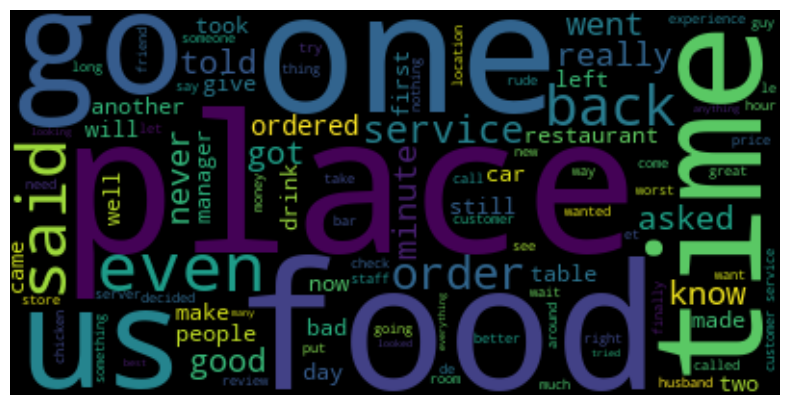

In [6]:
def word_cloud_rating(data, star_value):
    reviews_subset = data[data['stars'] == star_value]['text']
    word_cloud_text = ' '.join(reviews_subset)
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(word_cloud_text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

word_cloud_rating(data, 1)

In [7]:
def exercise_4():
    """Explicación de por qué la palabra 'good' aparece en reseñas negativas."""
    return "The word 'good' might appear in phrases like 'not good' or 'could be good'. Context matters."

exercise_4()

"The word 'good' might appear in phrases like 'not good' or 'could be good'. Context matters."

In [8]:
def exercise_5():
    """Encuentra las palabras de alta y baja frecuencia en las reseñas."""
    words = word_tokenize(' '.join(AllReviews))
    word_counts = Counter(words)
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    top_1_percent = sorted_words[:len(sorted_words)//100]
    bottom_1_percent = sorted_words[-len(sorted_words)//100:]

    return top_1_percent, bottom_1_percent

exercise_5()

([('.', 42232),
  ('the', 27814),
  (',', 25705),
  ('and', 22282),
  ('I', 21876),
  ('a', 19119),
  ('to', 16025),
  ('was', 12385),
  ('of', 10885),
  ('it', 9134),
  ('is', 8664),
  ('for', 7918),
  ('in', 7612),
  ('!', 7042),
  ('The', 6475),
  ('that', 6450),
  ('with', 5742),
  ('you', 5465),
  ('but', 5034),
  ('my', 5027),
  ('on', 4970),
  ("'s", 4852),
  ("n't", 4713),
  ('have', 4559),
  ('they', 4005),
  ('this', 3969),
  ('had', 3812),
  ('not', 3764),
  ('were', 3460),
  ('are', 3433),
  (')', 3402),
  ('at', 3265),
  ('we', 3143),
  ('so', 3024),
  ('as', 2982),
  ('be', 2971),
  ('place', 2945),
  ('(', 2901),
  ('It', 2801),
  ('me', 2791),
  ('good', 2707),
  ('food', 2536),
  ('there', 2363),
  ('here', 2352),
  ('out', 2318),
  ('like', 2196),
  ('just', 2141),
  ('very', 2104),
  ('do', 2088),
  ('all', 2074),
  ('one', 2068),
  ('up', 1972),
  ('...', 1972),
  ('would', 1939),
  ('time', 1937),
  ('from', 1873),
  ('or', 1857),
  ('get', 1841),
  ('They', 1776),

In [9]:
def get_top_n_words(corpus, n=1, k=1):
    vec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [10]:
def top_k_ngrams(word_tokens, n, k):
    """Encuentra los k n-gramas más frecuentes en el corpus."""
    vec = CountVectorizer(ngram_range=(n, n)).fit(word_tokens)
    bag_of_words = vec.transform(word_tokens)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:k]

top_k_ngrams(AllReviews[:1000], 1, 10)

[('the', np.int64(8630)),
 ('and', np.int64(5592)),
 ('to', np.int64(4414)),
 ('it', np.int64(3334)),
 ('was', np.int64(2897)),
 ('of', np.int64(2878)),
 ('is', np.int64(2038)),
 ('in', np.int64(2034)),
 ('for', np.int64(1932)),
 ('that', np.int64(1898))]

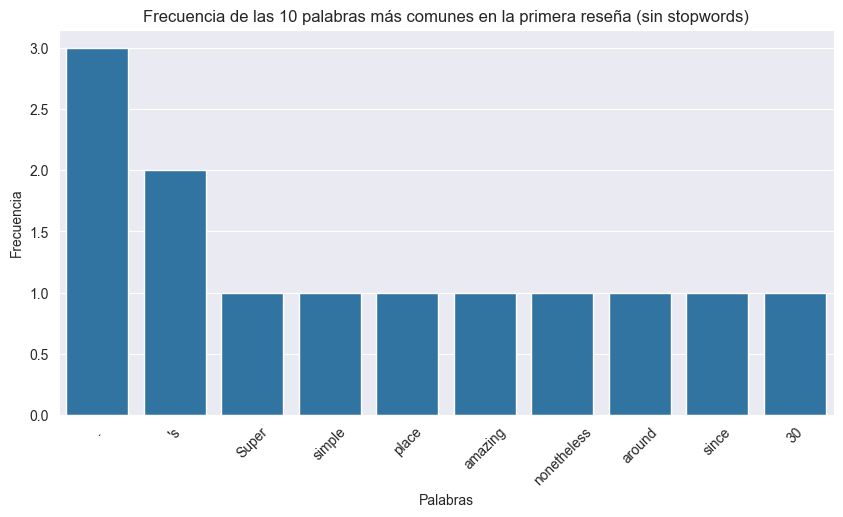

(['Super', 'simple', 'place', 'amazing', 'nonetheless', '.', "'s", 'around', 'since', '30', "'s", 'still', 'serve', 'thing', 'started', ':', 'bologna', 'salami', 'sandwich', 'mustard', '.', 'Staff', 'helpful', 'friendly', '.'], ['but', 'It', 'been', 'the', 'and', 'they', 'the', 'same', 'they', 'with', 'a', 'and', 'with', 'was', 'very', 'and'])


In [11]:
def exercise_7_1():
    """Filtra palabras vacías en la primera reseña y muestra las palabras filtradas y las eliminadas, además de una gráfica de frecuencias."""
    stop_words = set(stopwords.words('english'))
    first_review = word_tokenize(AllReviews[0])
    filtered_words = [w for w in first_review if w.lower() not in stop_words]
    removed_stopwords = [w for w in first_review if w.lower() in stop_words]

    # Graficar frecuencias de palabras filtradas
    word_counts = Counter(filtered_words)
    most_common_words = word_counts.most_common(10)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(words), y=list(counts))
    plt.title("Frecuencia de las 10 palabras más comunes en la primera reseña (sin stopwords)")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()

    return filtered_words, removed_stopwords

print(exercise_7_1())

In [12]:
def top_k_ngrams_filtered(n, k):
    """Encuentra los k n-gramas más frecuentes eliminando stopwords."""
    stop_words = set(stopwords.words('english'))
    filtered_reviews = [' '.join([word for word in word_tokenize(review) if word.lower() not in stop_words]) for review in AllReviews]
    vec = CountVectorizer(ngram_range=(n, n)).fit(filtered_reviews)
    bag_of_words = vec.transform(filtered_reviews)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:k]

print(top_k_ngrams_filtered(1, 10))

[('place', np.int64(2975)), ('good', np.int64(2893)), ('food', np.int64(2716)), ('one', np.int64(2323)), ('like', np.int64(2301)), ('great', np.int64(2088)), ('would', np.int64(1998)), ('time', np.int64(1974)), ('get', np.int64(1873)), ('really', np.int64(1846))]


In [13]:
def exercise_8_1():
    """Divide las reseñas en positivas y negativas y grafica las 20 palabras más comunes en cada caso."""
    good_reviews = data[data['stars'] > 3]['text']
    bad_reviews = data[data['stars'] <= 3]['text']

    top_good_words = top_k_ngrams(good_reviews, 1, 20)
    top_bad_words = top_k_ngrams(bad_reviews, 1, 20)

    return top_good_words, top_bad_words

print(exercise_8_1())

([('the', np.int64(19883)), ('and', np.int64(14249)), ('to', np.int64(9048)), ('it', np.int64(6653)), ('of', np.int64(6607)), ('was', np.int64(6270)), ('is', np.int64(5453)), ('for', np.int64(4852)), ('in', np.int64(4649)), ('you', np.int64(3918)), ('that', np.int64(3776)), ('with', np.int64(3624)), ('my', np.int64(3520)), ('they', np.int64(3346)), ('this', np.int64(3147)), ('on', np.int64(3036)), ('but', np.int64(2884)), ('have', np.int64(2758)), ('we', np.int64(2676)), ('are', np.int64(2210))], [('the', np.int64(14493)), ('and', np.int64(8648)), ('to', np.int64(7166)), ('was', np.int64(5570)), ('it', np.int64(5324)), ('of', np.int64(4353)), ('for', np.int64(3431)), ('in', np.int64(3269)), ('that', np.int64(3081)), ('is', np.int64(3039)), ('but', np.int64(2715)), ('my', np.int64(2456)), ('they', np.int64(2449)), ('we', np.int64(2237)), ('not', np.int64(2219)), ('with', np.int64(2191)), ('on', np.int64(2184)), ('you', np.int64(2156)), ('this', np.int64(2136)), ('have', np.int64(1714))]

In [14]:
def exercise_8_2():
    """Encuentra los 20 bigramas y trigramas más comunes en reseñas positivas y negativas."""
    return top_k_ngrams(AllReviews, 2, 20), top_k_ngrams(AllReviews, 3, 20)

print(exercise_8_2())

([('it was', np.int64(2442)), ('of the', np.int64(2418)), ('in the', np.int64(1984)), ('and the', np.int64(1862)), ('on the', np.int64(1600)), ('this place', np.int64(1404)), ('to the', np.int64(1193)), ('for the', np.int64(1146)), ('if you', np.int64(1121)), ('the food', np.int64(989)), ('to be', np.int64(985)), ('it is', np.int64(910)), ('at the', np.int64(888)), ('with the', np.int64(863)), ('this is', np.int64(773)), ('and it', np.int64(756)), ('they have', np.int64(756)), ('we were', np.int64(731)), ('to get', np.int64(667)), ('you can', np.int64(641))], [('this place is', np.int64(315)), ('and it was', np.int64(311)), ('one of the', np.int64(309)), ('if you re', np.int64(270)), ('the food was', np.int64(268)), ('the food is', np.int64(235)), ('the service was', np.int64(186)), ('in the area', np.int64(160)), ('on the menu', np.int64(158)), ('some of the', np.int64(156)), ('but it was', np.int64(154)), ('the first time', np.int64(139)), ('if you are', np.int64(134)), ('as well as'

In [15]:
def exercise_9_1():
    """Ideas para mejorar el procesamiento de texto en la detección de sentimientos."""
    explanation = (
        "Common words like 'felt like' should be ignored unless used in a negative sentiment phrase. "
        "We could use sentiment-aware phrase detection to distinguish between 'felt like home' (positive) "
        "and 'felt like a waste of time' (negative)."
    )
    return explanation

print(exercise_9_1())

Common words like 'felt like' should be ignored unless used in a negative sentiment phrase. We could use sentiment-aware phrase detection to distinguish between 'felt like home' (positive) and 'felt like a waste of time' (negative).


In [16]:
def exercise_9_2():
    """Propuesta para mejorar la detección de quejas específicas no captadas por análisis de bigramas."""
    complaint_example = "My hamburger was served cold and tasted awful."
    solution = "A potential solution is to use aspect-based sentiment analysis, where we identify key aspects (e.g., 'temperature', 'taste') and associate them with sentiment words."
    return complaint_example, solution

print(exercise_9_2())

('My hamburger was served cold and tasted awful.', "A potential solution is to use aspect-based sentiment analysis, where we identify key aspects (e.g., 'temperature', 'taste') and associate them with sentiment words.")
